Нашей компании нужно сгруппировать клиентов для АБ-тестов. Алгоритм группировки очень простой - взять ID клиента (состоит из 5-7 цифр, например 7412567) и найти сумму всех его цифр. Получившееся число и является номером группы, в которую входит данный клиент.

In [1]:
def group(ID):
    '''Возвращает номер группы клиента, равный сумме цифр его ID'''
    return sum(map(int, str(ID)))

In [2]:
group(7412567)

32

In [3]:
# Максимальный номер группы исходя из ограничений на количество цифр
group(9999999)

63

Для того, чтобы понять, насколько хорош такой простой алгоритм, нужно написать следующие диагностические функции:

Функция, которая подсчитывает число покупателей, попадающих в каждую группу, если нумерация ID сквозная и начинается с 0. На вход функция получает целое число n_customers (количество клиентов).  
Функция, аналогичная первой, если ID начинается с произвольного числа. На вход функция получает целые числа: n_customers (количество клиентов) и n_first_id (первый ID в последовательности).

In [4]:
# Т.к. диагностические функции аналогичны, объединил их в одну. Для первого случая n_first_id=0 по умолчанию.

def group_size(n_customers, n_first_id=0):
    '''
    Возвращает количество покупателей, попадающих в каждую группу.
    
        Параметры:
            n_customers (int): количество клиентов
            n_first_id (int): первый ID в последовательности (по умолчанию равен 0, что соответствует 
                              первому диагностическому тесту)
        Возвращаемое значение:
            group_size (dict): ключи словаря - номер группы, 
                               значения словаря- количество клиентов в данной группе
    '''
    group_size = {}
    for id in range(n_first_id, n_first_id + n_customers):
        if group(id) in group_size:
            group_size[group(id)] += 1
        else:
            group_size[group(id)] = 1
    return group_size

In [5]:
group_size(25)

{0: 1, 1: 2, 2: 3, 3: 3, 4: 3, 5: 3, 6: 3, 7: 2, 8: 2, 9: 2, 10: 1}

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ab_group = group_size(n_customers=2000, n_first_id=1000001)
ab_group_df = pd.DataFrame({"group":list(ab_group.keys()),
                            "group_size":list(ab_group.values())})

In [7]:
ab_group_df

,group,group_size
0,2,4
1,3,10
2,4,16
3,5,25
4,6,36
5,7,49
6,8,64
7,9,81
8,10,100
9,11,118


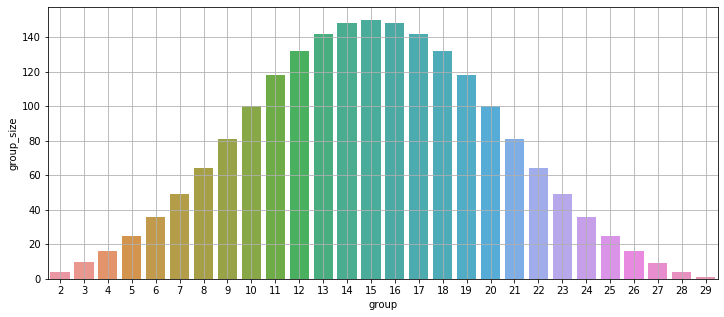

In [8]:
plt.figure(figsize=(12, 5))
sns.barplot(data=ab_group_df, x='group', y='group_size')
plt.grid()

Размеры групп существенно отличаются, форма распределения близка к нормальному. Группы с минимальными и максимальными номерами (что соответствует минимальной и максимальной сумме цифр ID клиентов) представлены малым количеством клиентов. Вероятно, потребуется пересмотр алгоритма распределения клиентов по группам для проведения A/B теста.